## [Phạm Thanh Nam] - [MindX - DA12 - Final Project]

<hr>

Hydrology (Thủy văn) là một môn khoa học liên ngành gồm toán, vật lý, cơ học, tin học và hóa học để nghiên cứu quy luật và sự vận động của nước trên bề mặt, lòng đấy, hay sông hồ. Các ứng dụng chính của thủy văn: Dự báo hạn hán, lũ lụt, phòng chống thiên tai, xây dựng đê điều cầu đường, công trình thủy, quy hoạch tài nguyên nước. 
Do hệ thống sông của thủy văn có 2 kiểu vùng sông là: sông ảnh hưởng triều bởi thủy triều và vùng ngọt ko ảnh hưởng thủy triều  nên ta có 2 bộ dữ liệu gồm: ban_don (Triều) và an_thuan (Ngọt)

In [1]:
# Import lib
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
print('import done!')

import done!


In [2]:
# Import data an_thuan

url='https://drive.google.com/file/d/1ZVKQDuuiAf7fzdmcX8iyg5_dAo8rmk9q/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
an_thuan = pd.read_csv(dwn_url)
an_thuan.head()

,Time,H
0,1/1/2010 0:00,149
1,1/1/2010 1:00,152
2,1/1/2010 2:00,136
3,1/1/2010 3:00,97
4,1/1/2010 4:00,42


In [3]:
an_thuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    87648 non-null  object
 1   H       87648 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
an_thuan['Time'] = pd.to_datetime(an_thuan['Time'])
an_thuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    87648 non-null  datetime64[ns]
 1   H       87648 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 MB


In [5]:
an_thuan

,Time,H
0,2010-01-01 00:00:00,149
1,2010-01-01 01:00:00,152
2,2010-01-01 02:00:00,136
3,2010-01-01 03:00:00,97
4,2010-01-01 04:00:00,42
...,...,...
87643,2019-12-31 19:00:00,126
87644,2019-12-31 20:00:00,117
87645,2019-12-31 21:00:00,104
87646,2019-12-31 22:00:00,83


In [6]:
# Chuyển dataset thành dữ liệu dạng chuỗi thời gian
an_thuan.set_index("Time", inplace = True)
an_thuan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87648 entries, 2010-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   H       87648 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [7]:
an_thuan.head()

,H
Time,
2010-01-01 00:00:00,149
2010-01-01 01:00:00,152
2010-01-01 02:00:00,136
2010-01-01 03:00:00,97
2010-01-01 04:00:00,42


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


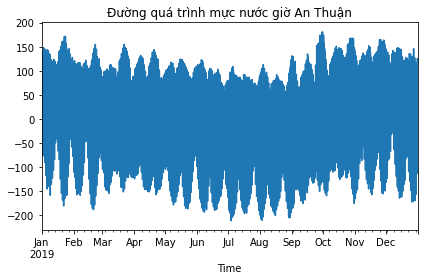

In [8]:
an_thuan2019 = an_thuan['2019']
an_thuan2019.H.plot(title='Đường quá trình mực nước giờ An Thuận')
plt.tight_layout()
plt.show()

In [9]:
an_thuan_test = an_thuan.query("Time >= '2017-01-01' \
                       and Time < '2019-12-31'")

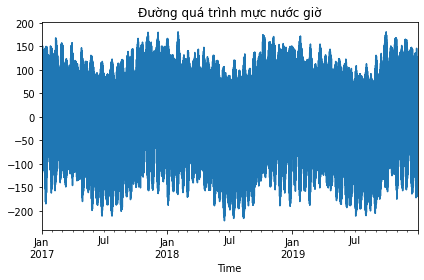

In [10]:
an_thuan_test.H.plot(title='Đường quá trình mực nước giờ')
plt.tight_layout()
plt.show()

In [11]:
# Import data ban_don

url='https://drive.google.com/file/d/1zISlRpgjmxR592xXhLV9Z3HAa6oetn-Z/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
ban_don = pd.read_csv(dwn_url)
ban_don.head()

,Date,X,H,Q,R
0,1/1/2016,-,16796,77.0,4.77
1,1/2/2016,-,16788,67.6,4.19
2,1/3/2016,-,16797,77.6,4.42
3,1/4/2016,-,16847,152.0,8.66
4,1/5/2016,-,16867,181.0,9.63


Bộ dữ liệu gồm 4 biến X H Q R
- `H`: Mực nước
- `X`: Lượng mưa
- `Q`: Lưu lượng
- `R`: Lưu lượng chất lơ lửng

<h1><font color = 'orange'> EDA: Exploratory Data Analysis <font></h1>

### 1. Feature Classification:

In [12]:
# Review dữ liệu
ban_don.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1096 non-null   object 
 1   X       1096 non-null   object 
 2   H       1096 non-null   int64  
 3   Q       1096 non-null   float64
 4   R       1096 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 42.9+ KB


- Dữ liệu đầy đủ không bị mất dữ liệu
- Dữ liệu có 2 kiểu là `int64` và `float64`; 
- Biến X dữ liệu `object` là do trong đo đạc thủy văn những ngày không mưa thường được kí hiệu bằng đấu gạch ngang `-`;
- Date là dữ liệu ngày ở dạng `object`.

**---> tiến hành data preprocessing**

In [13]:
##ban_don["Date"] = ban_don["Date"].astype("date")
##ban_don["X"] = ban_don["X"].astype("float")

#### Data imputation

In [14]:
# Thay dấu - thành số 0 trong biến X là những ngày không mưa
ban_don = ban_don.replace(to_replace ="-",
                 value = 0)
# thay đổi biến X từ object sang float64 
ban_don['X'] = ban_don['X'].astype('float64')
ban_don.head()

,Date,X,H,Q,R
0,1/1/2016,0.0,16796,77.0,4.77
1,1/2/2016,0.0,16788,67.6,4.19
2,1/3/2016,0.0,16797,77.6,4.42
3,1/4/2016,0.0,16847,152.0,8.66
4,1/5/2016,0.0,16867,181.0,9.63


- Trong bộ data ban_don H là mực nước được tính là (cm) quá lớn so với Q (m3/s) và R (g/m3) 

--> Ta quy đổi H từ cm sang m để phù hợp với dữ liệu

In [15]:
# Data transform
ban_don["H"] = ban_don["H"] / 100
ban_don.head()

,Date,X,H,Q,R
0,1/1/2016,0.0,167.96,77.0,4.77
1,1/2/2016,0.0,167.88,67.6,4.19
2,1/3/2016,0.0,167.97,77.6,4.42
3,1/4/2016,0.0,168.47,152.0,8.66
4,1/5/2016,0.0,168.67,181.0,9.63


In [16]:
ban_don.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1096 non-null   object 
 1   X       1096 non-null   float64
 2   H       1096 non-null   float64
 3   Q       1096 non-null   float64
 4   R       1096 non-null   float64
dtypes: float64(4), object(1)
memory usage: 42.9+ KB


In [17]:
# Chuyển dữ liệu ngày object thành dạng chuẩn
ban_don['Date'] = pd.to_datetime(ban_don['Date'])
ban_don.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1096 non-null   datetime64[ns]
 1   X       1096 non-null   float64       
 2   H       1096 non-null   float64       
 3   Q       1096 non-null   float64       
 4   R       1096 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 42.9 KB


In [18]:
# Chuyển dataset thành dữ liệu dạng chuỗi thời gian
ban_don.set_index("Date", inplace = True)

In [19]:
ban_don.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2016-01-01 to 2018-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1096 non-null   float64
 1   H       1096 non-null   float64
 2   Q       1096 non-null   float64
 3   R       1096 non-null   float64
dtypes: float64(4)
memory usage: 42.8 KB


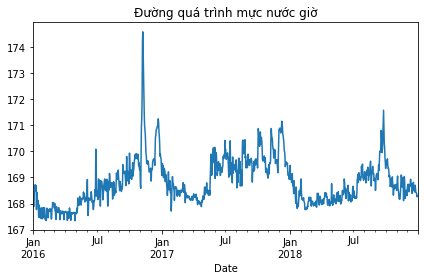

In [20]:
ban_don.H.plot(title='Đường quá trình mực nước giờ')
plt.tight_layout()
plt.show()

In [21]:
ban_don.head()

,X,H,Q,R
Date,,,,
2016-01-01,0.0,167.96,77.0,4.77
2016-01-02,0.0,167.88,67.6,4.19
2016-01-03,0.0,167.97,77.6,4.42
2016-01-04,0.0,168.47,152.0,8.66
2016-01-05,0.0,168.67,181.0,9.63


In [22]:
ban_don_test = ban_don.query("Date >= '2018-01-01' \
                       and Date < '2018-12-31'")
ban_don_test

,X,H,Q,R
Date,,,,
2018-01-01,0.0,169.41,309.0,8.71
2018-01-02,0.0,169.46,318.0,7.73
2018-01-03,0.0,168.92,227.0,4.11
2018-01-04,0.0,168.93,228.0,4.13
2018-01-05,0.0,169.01,240.0,21.80
...,...,...,...,...
2018-12-26,0.0,168.44,152.0,10.70
2018-12-27,0.0,168.42,149.0,11.40
2018-12-28,0.0,168.39,144.0,10.60


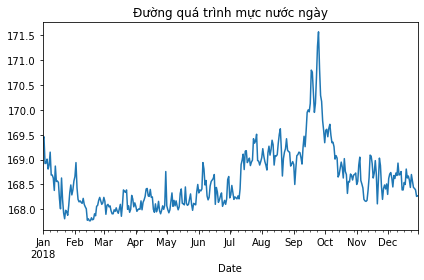

In [23]:
ban_don_test.H.plot(title='Đường quá trình mực nước ngày')
plt.tight_layout()
plt.show()

In [24]:
ban_don_train = ban_don["2016":"2017"]
ban_don_train

,X,H,Q,R
Date,,,,
2016-01-01,0.0,167.96,77.0,4.77
2016-01-02,0.0,167.88,67.6,4.19
2016-01-03,0.0,167.97,77.6,4.42
2016-01-04,0.0,168.47,152.0,8.66
2016-01-05,0.0,168.67,181.0,9.63
...,...,...,...,...
2017-12-27,0.0,169.08,249.0,22.80
2017-12-28,0.0,169.10,251.0,18.40
2017-12-29,0.0,169.06,246.0,17.50


## 2. Distribution of data

In [25]:
ban_don.describe()

,X,H,Q,R
count,1096.000000,1096.000000,1096.000000,1096.000000
mean,4.054380,168.822947,215.013996,23.007790
std,10.723077,0.885566,147.544661,38.540942
min,0.000000,167.340000,9.140000,0.098000
25%,0.000000,168.170000,109.000000,4.930000
50%,0.000000,168.665000,182.500000,12.200000
75%,2.500000,169.350000,296.000000,29.125000
max,101.000000,174.570000,1450.000000,619.000000


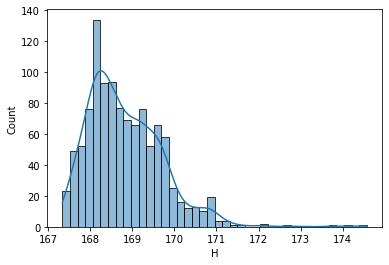

In [26]:
sns.histplot(data=ban_don, x='H', bins = 40, kde = True );

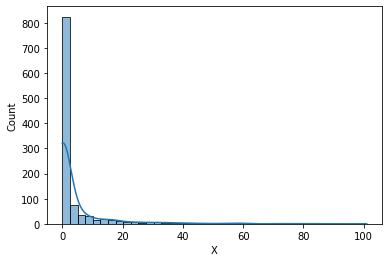

In [27]:
sns.histplot(data=ban_don, x='X', bins = 40, kde = True );

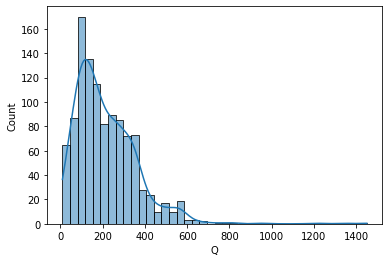

In [28]:
sns.histplot(data=ban_don, x='Q', bins = 40, kde = True );

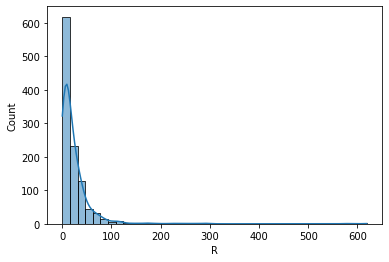

In [29]:
sns.histplot(data=ban_don, x='R', bins = 40, kde = True );

### Correlating Feature

In [30]:
#covariance 
ban_don.cov()

,X,H,Q,R
X,114.984383,1.253919,187.694672,67.230021
H,1.253919,0.784226,129.755569,21.787896
Q,187.694672,129.755569,21769.427091,3877.748130
R,67.230021,21.787896,3877.748130,1485.404235


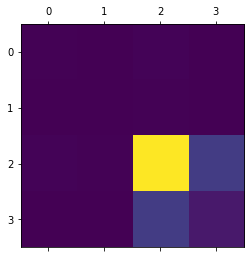

In [31]:
#corr plot
plt.matshow(ban_don.cov())
plt.show()

In [32]:
# Tương quan dữ liệu
ban_don.corr()

,X,H,Q,R
X,1.000000,0.132047,0.118634,0.162675
H,0.132047,1.000000,0.993074,0.638370
Q,0.118634,0.993074,1.000000,0.681921
R,0.162675,0.638370,0.681921,1.000000


In [33]:
# Visual correlation
ban_don_corr = ban_don.corr()

In [34]:
#ones_like build a matrix of booleans with out data - hàm one_like để tạo matrix của các toán tử boonleans (true,fasle)
ones_corr = np.ones_like(ban_don_corr, dtype=bool)
# np's triu: hàm lấy 1 nửa tam giác của ma trận trên
mask = np.triu(ones_corr)
# Bỏ các cột lenght và lenght_normalize để visual đẹp hơn
adjust_mask = mask[1:, :-1]
adjust_ban_don_corr = ban_don_corr.iloc[1: ,:-1]

In [35]:
adjust_ban_don_corr

,X,H,Q
H,0.132047,1.000000,0.993074
Q,0.118634,0.993074,1.000000
R,0.162675,0.638370,0.681921


Text(0.0, 1.0, 'CORRELATION MATRIX\nHYDROLOGY\n')

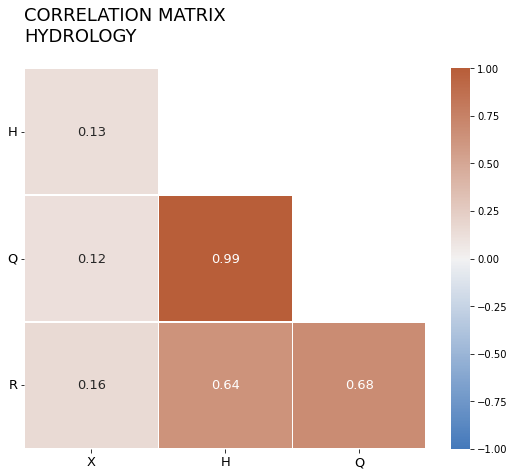

In [36]:
#Heatmap
fig, ax = plt.subplots(figsize=(9,7))

#tạo bảng màu HUSL (Hsluv.org)
cmap = sns.diverging_palette(250, 25, as_cmap=True) #0, 230, 90, 60, as_cmap=True 
sns.heatmap(data=adjust_ban_don_corr, mask=adjust_mask,
           annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap =cmap,
           vmin=-1, vmax=1,
           linecolor='white',linewidths=0.5);

yticks = [i.upper() for i in adjust_ban_don_corr.index]
xticks = [i.upper() for i in adjust_ban_don_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=0, fontsize=13);

title = 'CORRELATION MATRIX\nHYDROLOGY\n'
ax.set_title(title, loc='left',fontsize=18)
#plt.savefig('ccorrr.svg') # đã export

- H với Q có tương quan tốt nhất;
- Tiếp đến là H vs R và R vs Q;
- Ta sẽ loại biến X khi chạy mô hình độ tương quan thấp. 

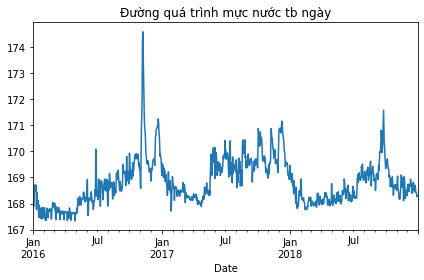

In [37]:
# Đường quá trình mực nước tb ngày
ban_don.H.plot(title='Đường quá trình mực nước tb ngày')
plt.tight_layout()

plt.show()

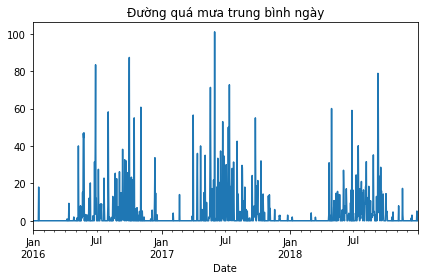

In [38]:
ban_don.X.plot(title='Đường quá mưa trung bình ngày')
plt.tight_layout()
plt.show()

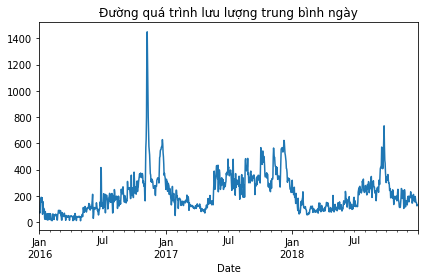

In [39]:
ban_don.Q.plot(title='Đường quá trình lưu lượng trung bình ngày')
plt.tight_layout()
plt.show()

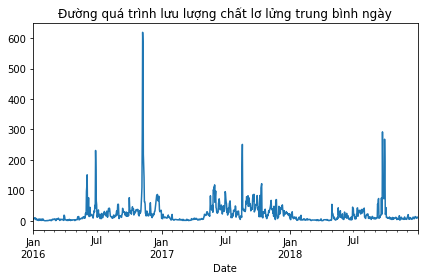

In [40]:
ban_don.R.plot(title='Đường quá trình lưu lượng chất lơ lửng trung bình ngày')
plt.tight_layout()
plt.show()

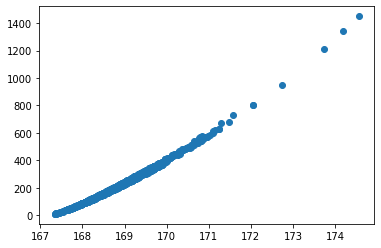

In [41]:
# scatter
plt.scatter(ban_don['H'],ban_don['Q'])
plt.show()

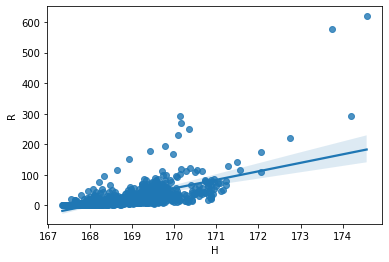

In [42]:
sns.regplot(x="H", y="R", data=ban_don)

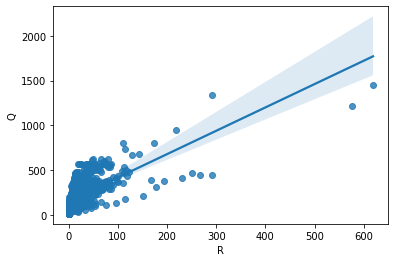

In [43]:
sns.regplot(x="R", y="Q", data=ban_don)

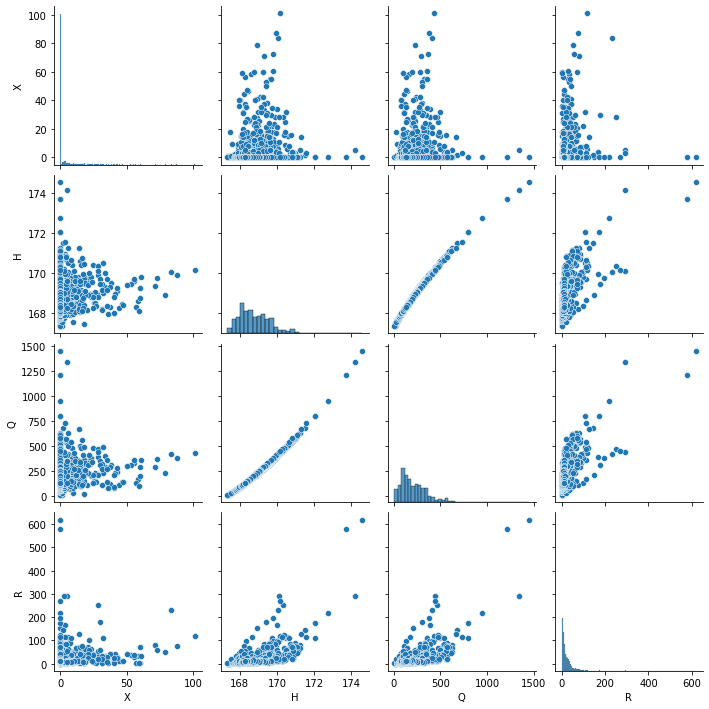

In [44]:
sns.pairplot(ban_don)

<h2><font color = 'orange'> Linear regression <font></h2>

In [45]:
ban_don['Return'] = ban_don['H'].pct_change() * 100
ban_don['Lagged_Return'] = ban_don.Return.shift()
ban_don = ban_don.dropna()
train = ban_don['2016':'2017']
test = ban_don['2018']
# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


In [46]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

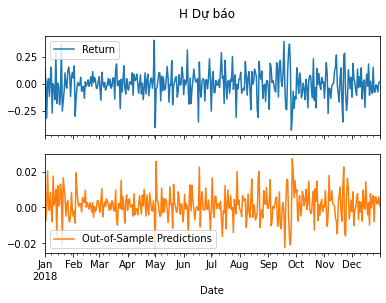

In [48]:
import matplotlib.pyplot as plt
out_of_sample_results = y_test.to_frame()
# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='H Dự báo')
plt.show()

In [49]:
out_of_sample_results["Out-of-Sample Predictions"]

Date
2018-01-01   -0.006872
2018-01-02   -0.007567
2018-01-03   -0.000498
2018-01-04    0.020313
2018-01-05    0.000912
                ...   
2018-12-27    0.005876
2018-12-28    0.001976
2018-12-29    0.002331
2018-12-30    0.005881
2018-12-31    0.000911
Name: Out-of-Sample Predictions, Length: 365, dtype: float64

In [50]:
y_test

Date
2018-01-01    0.147789
2018-01-02    0.029514
2018-01-03   -0.318659
2018-01-04    0.005920
2018-01-05    0.047357
                ...   
2018-12-27   -0.011874
2018-12-28   -0.017813
2018-12-29   -0.077202
2018-12-30    0.005943
2018-12-31    0.017828
Name: Return, Length: 365, dtype: float64

<h2><font color = 'orange'> SARIMAX <font></h2> 

In [51]:
#an_thuan['Return'] = an_thuan['H'].pct_change() * 100
#an_thuan['Lagged_Return'] = an_thuan.Return.shift()
#an_thuan = ban_don.dropna()
#train = an_thuan['2010':'2016']
#test = an_thuan['2017':'2019']
# Create train and test sets for dependent and independent variables
#X_train = train["Lagged_Return"].to_frame()
#y_train = train["Return"]
#X_test = test["Lagged_Return"].to_frame()
#y_test = test["Return"]
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#import matplotlib.pyplot as plt
#plt.figure(figsize = (8, 6))
#ax1 = plot_acf(r_t)

In [52]:
# Import data ban_don

url='https://drive.google.com/file/d/1zISlRpgjmxR592xXhLV9Z3HAa6oetn-Z/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
ban_don = pd.read_csv(dwn_url)
ban_don.head()

# Thay dấu - thành số 0 trong biến X là những ngày không mưa
ban_don2 = ban_don.replace(to_replace ="-",
                 value = 0)
# thay đổi biến X từ object sang float64 
ban_don2['X'] = ban_don2['X'].astype('float64')
ban_don2.head()

# Data transform
ban_don2["H"] = ban_don2["H"] / 100
ban_don2.head()

# Chuyển dữ liệu ngày object thành dạng chuẩn
ban_don2['Date'] = pd.to_datetime(ban_don2['Date'])
ban_don2.info()

# Chuyển dataset thành dữ liệu dạng chuỗi thời gian
ban_don2.set_index("Date", inplace = True)

ban_don2_test = ban_don2.query("Date >= '2018-01-01' \
                       and Date < '2018-12-31'")

ban_don2_train = ban_don2["2016":"2017"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1096 non-null   datetime64[ns]
 1   X       1096 non-null   float64       
 2   H       1096 non-null   float64       
 3   Q       1096 non-null   float64       
 4   R       1096 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 42.9 KB


In [53]:
ban_don2_test

,X,H,Q,R
Date,,,,
2018-01-01,0.0,169.41,309.0,8.71
2018-01-02,0.0,169.46,318.0,7.73
2018-01-03,0.0,168.92,227.0,4.11
2018-01-04,0.0,168.93,228.0,4.13
2018-01-05,0.0,169.01,240.0,21.80
...,...,...,...,...
2018-12-26,0.0,168.44,152.0,10.70
2018-12-27,0.0,168.42,149.0,11.40
2018-12-28,0.0,168.39,144.0,10.60


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

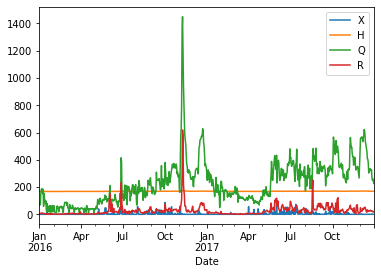

In [55]:
ban_don2_train.plot()

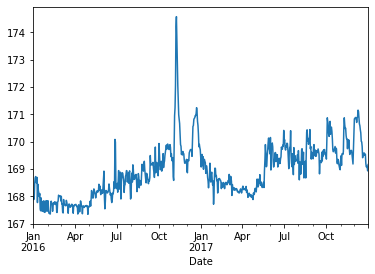

In [56]:
ban_don2_train['H'].plot()

In [57]:
# có xu hướng tuy nhiên xu hướng tăng ko đáng kể. Trong sông mực nước tăng phụ thuộc nhiều vào nhiệt độ hằng năm cùng với tình hình mua lũ và hoạt động sử dụng nước của con người do đó ta sẽ giả định bỏ qua trend và k_diff đặt thành 1.
# Bộ data có sự khác biệt theo mùa, vì một số cổ tức hàng tháng rõ ràng là nhiều hơn các tháng khác.
# o đó, k_seasonal_diff = True,  seasonal_periods = 12 vì có chu kỳ 12 tháng một lần.
from statsmodels.tsa.statespace.tools import diff 
ban_don_diffdvds_2=diff(ban_don2_train, k_diff=0, k_seasonal_diff=True, seasonal_periods=12)
ban_don_diffdvds_2

,X,H,Q,R
Date,,,,
2016-01-13,0.0,0.16,22.2,-1.14
2016-01-14,0.0,0.11,14.5,-1.19
2016-01-15,0.0,0.13,20.6,-0.43
2016-01-16,0.0,-0.93,-123.2,-7.49
2016-01-17,18.0,-1.20,-160.6,-7.95
...,...,...,...,...
2017-12-27,0.0,-1.24,-213.0,7.40
2017-12-28,0.0,-0.91,-157.0,-14.90
2017-12-29,0.0,-0.93,-158.0,-6.70


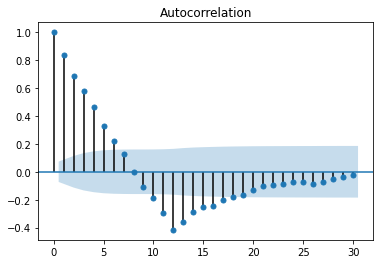

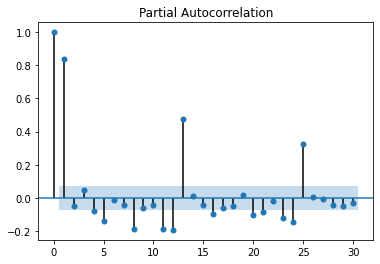

In [58]:
# Vẽ Biểu đồ ACF và PACF để xác định Mô hình SARIMA
sm.graphics.tsa.plot_acf(ban_don_diffdvds_2['H'].values.squeeze(), lags=30) # You can change the lags value if you want to see more lags
sm.graphics.tsa.plot_pacf(ban_don_diffdvds_2['H'].values.squeeze(), lags=30)
plt.show()

In [59]:
# Chạy mô hình phân tích
# Theo biểu đồ ACF và PACF ở trên, xác định AR (1) cho mô hình không theo mùa.
# MA (1) cho mô hình theo mùa. Từ ACF, Xác nhận data có chu kỳ 12 tháng một lần.
mod = sm.tsa.SARIMAX(ban_don_diffdvds_2['H'], order=(1,0,0),seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                  H   No. Observations:                  719
Model:             SARIMAX(1, 0, 0)x(0, 1, 1, 12)   Log Likelihood                -459.900
Date:                            Mon, 16 May 2022   AIC                            925.799
Time:                                    11:08:30   BIC                            939.482
Sample:                                01-13-2016   HQIC                           931.086
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8369      0.014     58.984      0.000       0.809       0.865
ma.S.L12      -0.9993      2.011   

In [60]:
# Dự báo 30 ngày H
print(res.forecast(30))

2018-01-01   -0.200299
2018-01-02   -0.161559
2018-01-03   -0.128366
2018-01-04   -0.104989
2018-01-05   -0.092443
2018-01-06   -0.077047
2018-01-07   -0.068399
2018-01-08   -0.057176
2018-01-09   -0.042642
2018-01-10   -0.037790
2018-01-11   -0.017008
2018-01-12   -0.017867
2018-01-13   -0.006020
2018-01-14    0.001039
2018-01-15    0.007718
2018-01-16    0.008903
2018-01-17    0.002877
2018-01-18    0.002729
2018-01-19   -0.001632
2018-01-20   -0.001296
2018-01-21    0.004125
2018-01-22    0.001351
2018-01-23    0.015750
2018-01-24    0.009549
2018-01-25    0.016926
2018-01-26    0.020243
2018-01-27    0.023790
2018-01-28    0.022355
2018-01-29    0.014135
2018-01-30    0.012151
Freq: D, dtype: float64


In [61]:
ban_don_diffdvds_2_test=diff(ban_don2_test, k_diff=0, k_seasonal_diff=True, seasonal_periods=12)
ban_don_diffdvds_2_test

,X,H,Q,R
Date,,,,
2018-01-13,0.0,-0.54,-91.0,3.69
2018-01-14,0.0,-0.90,-149.0,1.90
2018-01-15,0.0,-0.35,-56.0,7.39
2018-01-16,0.0,-0.39,-62.0,7.07
2018-01-17,0.0,-0.80,-125.0,-13.67
...,...,...,...,...
2018-12-26,0.0,-0.32,-49.0,5.76
2018-12-27,-3.0,0.03,5.0,6.24
2018-12-28,0.0,0.00,0.0,4.54


==> Vùng sông ảnh hưởng thủy triều mực nước lên xuống bất thường trong năm do ảnh hưởng thủy triều nên mô hình dự đoán số liệu mực nước H với sai số lớn ==> **mô hình chưa đạt**.


<h2><font color = 'orange'> SARIMA <font></h2> 

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [63]:
# Import data an_thuan

url='https://drive.google.com/file/d/1UEKjrw8iCKjj4AKj_TDqw5oXa3Y05NP7/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
an_thuan2 = pd.read_csv(dwn_url)


# Chuyển dữ liệu ngày object thành dạng chuẩn
an_thuan2['day'] = pd.to_datetime(an_thuan2['day'])


# Chuyển dataset thành dữ liệu dạng chuỗi thời gian
an_thuan2.set_index("day", inplace = True)

an_thuan2_test = an_thuan2.query("day >= '2017-01-01' \
                       and day < '2019-12-31'")

an_thuan2_train = an_thuan2["2010":"2016"]

#asfreq
an_thuan2_train = an_thuan2_train.asfreq('M', method='bfill')
an_thuan2_train

,H
day,
2010-01-31,11
2010-02-28,-5
2010-03-31,16
2010-04-30,10
2010-05-31,-2
...,...
2016-08-31,-5
2016-09-30,1
2016-10-31,26


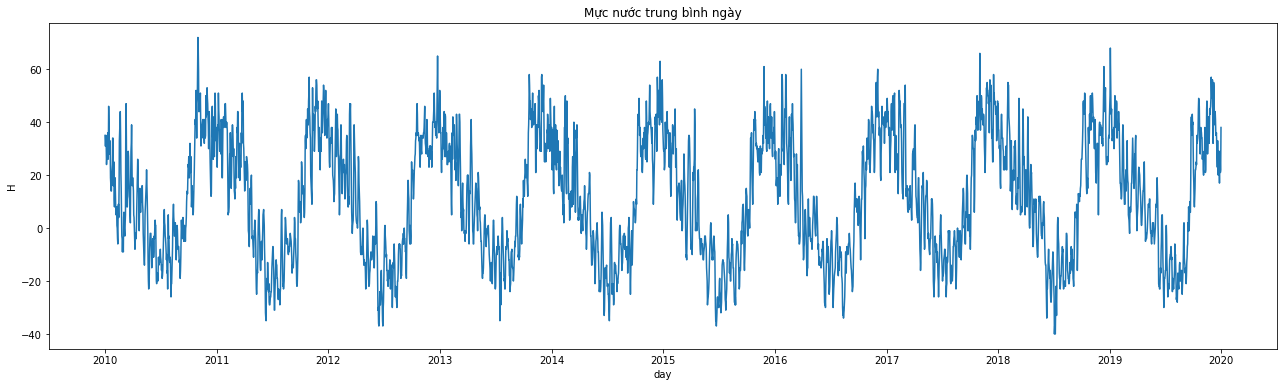

In [64]:
#Kiểm tra chuỗi thời gian hoạt động ntn?
plt.figure(figsize=(22,6))
sns.lineplot(x=an_thuan2.index, y=an_thuan2['H'])
plt.title('Mực nước trung bình ngày')
plt.show()

**Chuỗi số liệu thể hiện theo mùa**

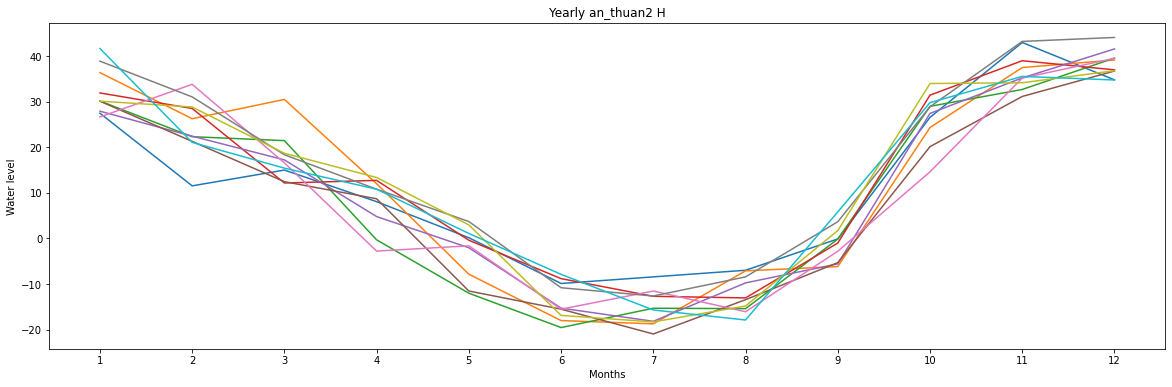

In [65]:
# Tạo bảng tổng kết để vẽ biểu đồ mực nước tháng qua từng năm
an_thuan2['month'] = an_thuan2.index.month
an_thuan2['year'] = an_thuan2.index.year
pivot = pd.pivot_table(an_thuan2, values='H', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Yearly an_thuan2 H')
plt.xlabel('Months')
plt.ylabel('Water level')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

- Ta có thể thấy chuỗi số liệu là seasonality. Mực nước trung bình sẽ hạ thấp vào tháng 6 đến 8 là các tháng mùa cạn nguồn nước bị thất thoát từ bốc hơi và như cầu sử dụng của con người.
- Từ tháng 10 đến tháng 2 năm sau mực nước co do đây là khoảng thời gian mùa lũ trong năm mưa nhiều. Nước đổ từ các vùng thượng nguồn vào sông khá lớn.

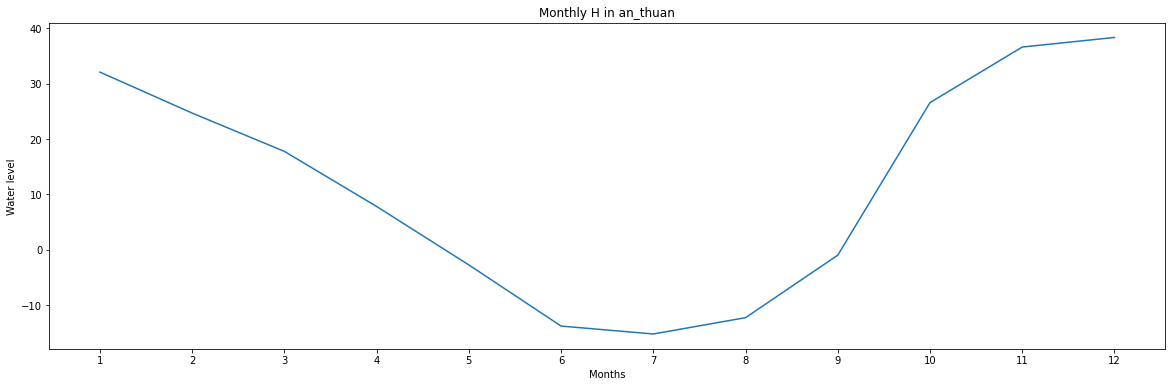

In [66]:
# Vẽ biểu đồ mực nước trung bình 10 năm từ 2010 - 2019
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly H in an_thuan')
plt.xlabel('Months')
plt.ylabel('Water level')
plt.xticks([x for x in range(1,13)])
plt.show()

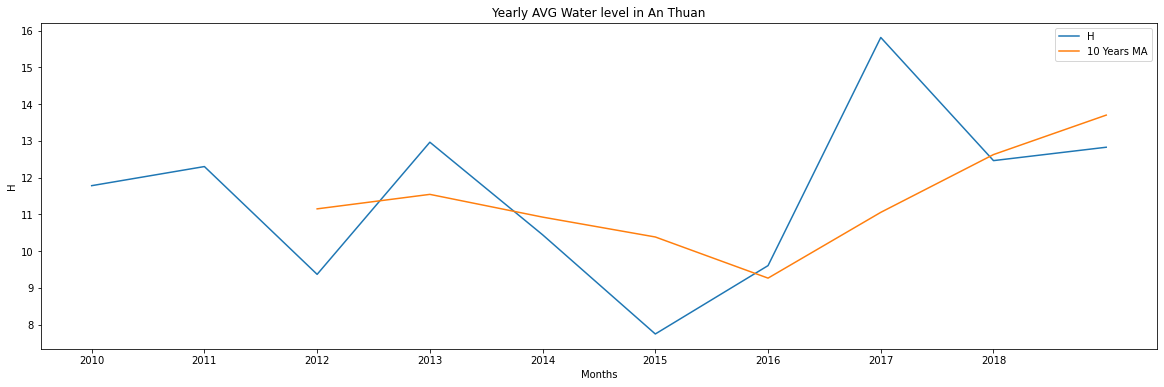

In [67]:
# Vẽ moving average để hiển thị xu hướng qua từng năm của chuỗi số liệu
year_avg = pd.pivot_table(an_thuan2, values='H', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['H'].rolling(3).mean()
year_avg[['H','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Water level in An Thuan')
plt.xlabel('Months')
plt.ylabel('H')
plt.xticks([x for x in range(2010,2019,1)])
plt.show()

In [68]:
# chia data
train = an_thuan2[:-60].copy()
val = an_thuan2[-60:-12].copy()
test = an_thuan2[-12:].copy()

In [69]:
#trainn = an_thuan2_train
#vall = an_thuan2["2016":"2017"]
#testt = an_thuan2_test

#an_thuan2_test = an_thuan2.query("day >= '2017-01-01' \
#                       and day < '2019-12-31'")

#an_thuan2_train = an_thuan2["2010":"2016"]

Tạo dự báo cơ sở trong bộ xác thực trong mô hình để giảm sai số.

In [70]:
#Excluding the first line, as it has NaN values
baseline = val['H'].shift()
#baseline2 = vall['H'].shift()

In [71]:
baseline.dropna(inplace=True)
baseline.head()
#baseline2.dropna(inplace=True)
#baseline2.head()

day
2019-11-03    28.0
2019-11-04    22.0
2019-11-05    20.0
2019-11-06    28.0
2019-11-07    29.0
Name: H, dtype: float64

Sử dụng RMSE làm cơ sở để tính toán lỗi,

In [72]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))


In [73]:
# Using the function with the baseline values
rmse_base = measure_rmse(val.iloc[1:,0],baseline)
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)} cm')

The RMSE of the baseline that we will try to diminish is 6.8588 cm


In [74]:
#Hàm kiểm tra tính ổn định
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('An Thuận Water level Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

- Một cách để kiểm tra xem chuỗi có đứng yên hay không là sử dụng hàm adfuller, nếu P-Value thấp hơn 5% (số thông thường được sử dụng cho loại nghiên cứu này) thì chuỗi là tĩnh thì ta có thể chạy mô hình.
- Nếu chuỗi không cố định ta transform data để sử dụng logarit tự nhiên, giảm phát, chênh lệch, v.v.
- Các phương pháp kiểm tra tính ổn định trong bài bao gồm:
    + Hàm tự tương quan (ACF) (The autocorrelation function) - Dạng đồ thị: Cho biết mối tương quan giữa mực nước hiện tại so với các phiên bản trễ (lagged) của chính nó.
    + Tự tương quan một phần (PACF) (The partial autocorrelation):Nó cho thấy mối tương quan mực nước hiện tại so với phiên bản bị trễ (lagged) loại trừ ảnh hưởng của độ trễ trước đó, ví dụ, nó cho thấy ảnh hưởng hiệu quả của độ trễ 3 đối với mực nước hiện tại không bao gồm ảnh hưởng của độ trễ 1 và 2.


Results of Dickey-Fuller Test:
Test Statistic                   -3.8081
p-value                           0.0028
Lags Used                        30.0000
Number of Observations Used    3561.0000
Critical Value (1%)              -3.4322
Critical Value (5%)              -2.8624
Critical Value (10%)             -2.5672
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


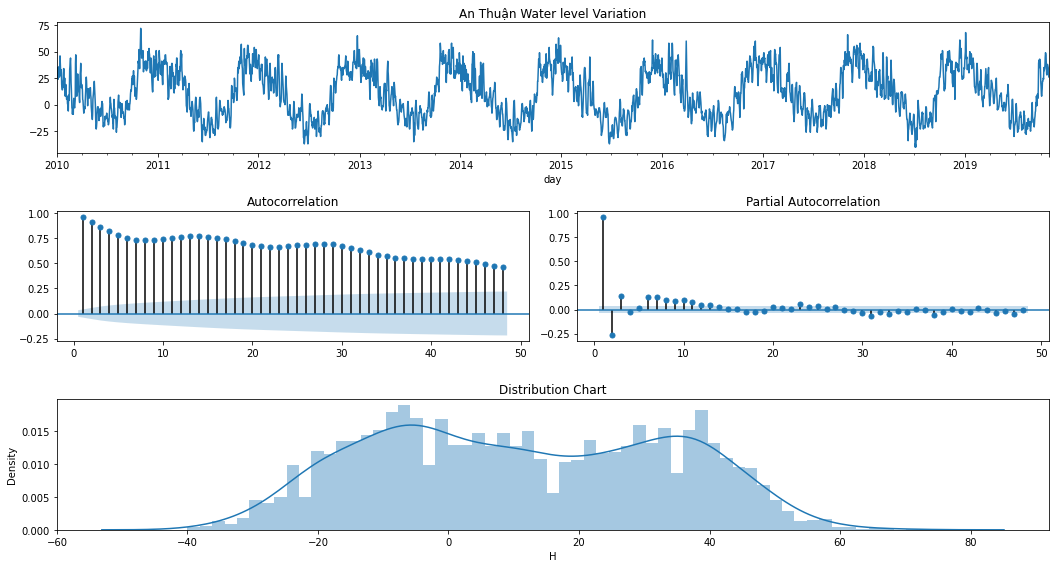

In [75]:
check_stationarity(train['H'])

#p-value is < 0.001 : correlation is very significant
#p-value is < 0.05: correlation is significant
#p-value is < 0.1: the correlation is weakly significant
#p-value is > 0.1: no evidence that the correlation is significant

Như chúng ta có thể thấy, chuỗi thời gian có một xu hướng giảm rồi tăng và điều này nguyên nhân do nguồn nước qua từng năm có thể bị thất thoát do nhiều nguyên nhân như xả đê xả lũ, sử dụng nguồn nước hay do nhiệt độ cao làm nguồn nước bị bốc hơi và thất thoát nguồn nước. Hoặc do rừng ở lưu vực bị chặt phá dẫn đến về mùa cạn thiếu lượng nước ngầm dự trữ để đổ vào sông

Để tạo dự báo chuỗi thời gian, chuỗi phải cố định (giá trị trung bình không đổi, phương sai và tự tương quan).

Results of Dickey-Fuller Test:
Test Statistic                   -9.3530
p-value                           0.0000
Lags Used                        30.0000
Number of Observations Used    3549.0000
Critical Value (1%)              -3.4322
Critical Value (5%)              -2.8624
Critical Value (10%)             -2.5672
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


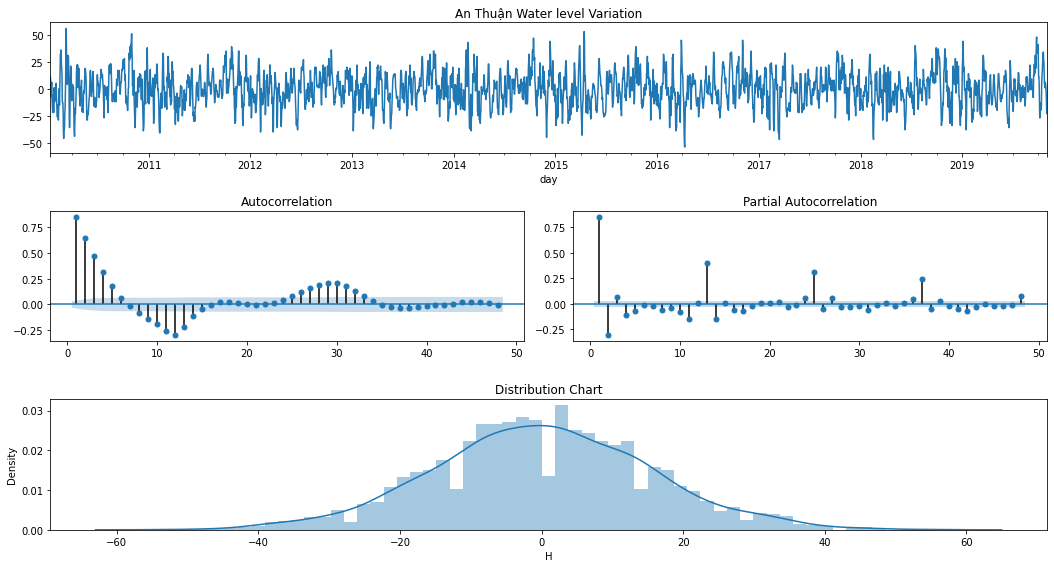

In [76]:
check_stationarity(train['H'].diff(12).dropna())


Ta có thể thấy sư tương quan âm là do trong các tháng mùa lũ mực nước tăng cao, các tháng mùa cạn mực nước giảm thấp

In [77]:
# bước 
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

# train

In [78]:
val['Pred'] = walk_forward(train['H'], val['H'], ((1,0,0),(0,1,1,12),'t'))
#((1,0,0),(0,1,1,12),'t')) 3% 
#((1,0,0),(0,1,1,12),'ct')) 1,67%


In [79]:
rmse_pred = measure_rmse(val['H'], val['Pred'])

print(f"The RMSE of the SARIMA(1,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)} celsius degrees")
print(f"It's a decrease of {round((rmse_pred/rmse_base-1)*100,2)}% in the RMSE")

The RMSE of the SARIMA(1,0,0),(0,1,1,12),'c' model was 7.6697 celsius degrees
It's a decrease of 11.82% in the RMSE


In [80]:
val['Error'] = val['H'] - val['Pred']

In [81]:
def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [82]:
# We need to remove some columns to plot the charts
val.drop(['month','year'], axis=1, inplace=True)
val.head()

,H,Pred,Error
day,,,
2019-11-02,28,27.540795,0.459205
2019-11-03,22,25.697765,-3.697765
2019-11-04,20,18.847902,1.152098
2019-11-05,28,19.782691,8.217309
2019-11-06,29,33.757171,-4.757171


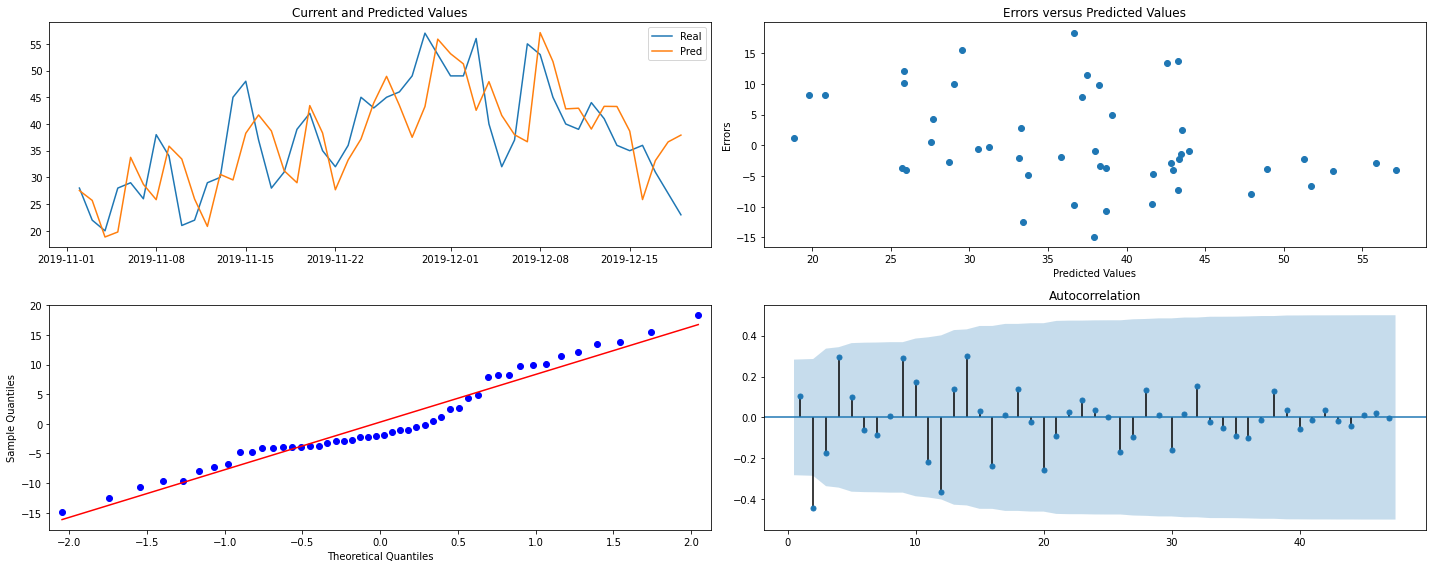

In [83]:
plot_error(val)

In [84]:
future = pd.concat([train['H'], val['H']])
future.head()

day
2010-01-01    35
2010-01-02    31
2010-01-03    31
2010-01-04    35
2010-01-05    31
Name: H, dtype: int64

# mod

In [85]:
# Using the same parameters of the fitted model
model = sm.tsa.statespace.SARIMAX(future, order=(1,0,0), seasonal_order=(0,1,1,12), trend='t')
result = model.fit(disp=False)

In [86]:
test['Pred'] = result.predict(start=(len(future)), end=(len(future)+13))

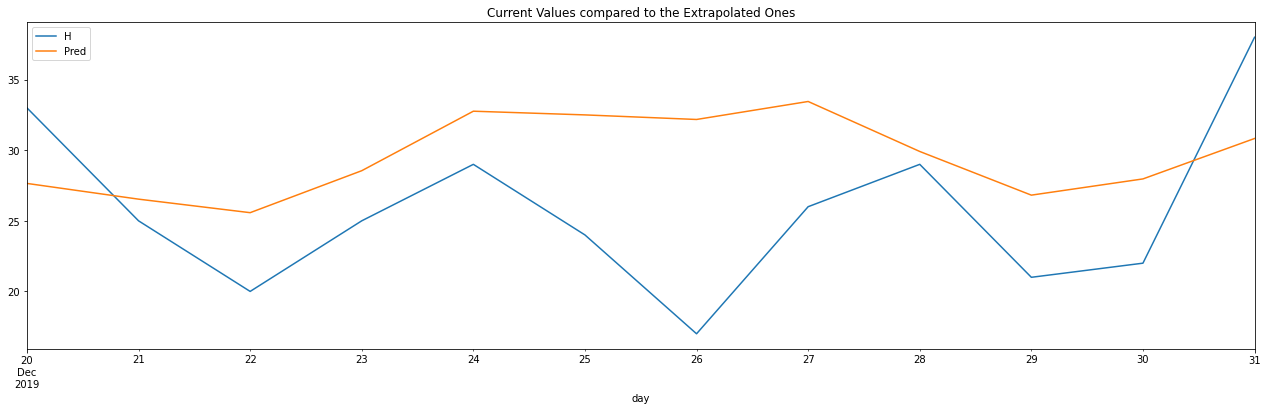

In [87]:
test[['H', 'Pred']].plot(figsize=(22,6))
plt.title('Current Values compared to the Extrapolated Ones')
plt.show()

In [88]:
test_baseline = test['H'].shift()

test_baseline[0] = test['H'][0]

rmse_test_base = measure_rmse(test['H'],test_baseline)
rmse_test_extrap = measure_rmse(test['H'], test['Pred'])

print(f'The baseline RMSE for the test baseline was {round(rmse_test_base,2)} CM')
print(f'The baseline RMSE for the test extrapolation was {round(rmse_test_extrap,2)} CM')
print(f'That is an improvement of {-round((rmse_test_extrap/rmse_test_base-1)*100,2)}%')

The baseline RMSE for the test baseline was 7.16 CM
The baseline RMSE for the test extrapolation was 6.88 CM
That is an improvement of 3.84%


---> **Mô hình dự đoán được xu hướng mực nước diễn ra trong tương lai**

## Thank you!

### Author

[**Phạm Thanh Nam**](https://nampham111.wordpress.com/contact/)


### Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-05-15        | 1.0     | Nam     | up to colab    |
